# IMDB Posters *Labels* Exploratory Data Analysis (Matan)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import os

In [2]:
df = pd.read_csv('..\_Data\movie_genres_all_labels_for_EDA.csv')

In [3]:
print('number of movies in the database:', len(df))

number of movies in the database: 37568


In [4]:
df.head()

imdbId                        Title  year  Sci-Fi  Fantasy  Family  \
0  114709                    Toy Story  1995       0        0       0   
1  113497                      Jumanji  1995       0        0       1   
2  113228             Grumpier Old Men  1995       0        0       0   
3  114885            Waiting to Exhale  1995       0        0       0   
4  113041  Father of the Bride Part II  1995       0        0       1   

   Animation  Game-Show  Sport  News  ...    Documentary  Romance  Biography  \
0          1          0      0     0  ...              0        0          0   
1          0          0      0     0  ...              0        0          0   
2          0          0      0     0  ...              0        1          0   
3          0          0      0     0  ...              0        1          0   
4          0          0      0     0  ...              0        1          0   

   Adventure  Crime  Horror  Musical  Action  Thriller  Drama  
0          1      0       0        0       0         0      0  
1          1      0       0        0       1         0      0  
2          0      0       0        0       0         0      0  
3          0      0       0        0       0         0      1  
4          0      0       0        0       0         0      0  

[5 rows x 31 columns]

In [5]:
list_of_genres = df.columns[3:]

### Frequency table by genre

In [7]:
df_freq = pd.concat([df[list_of_genres].sum().sort_values(ascending=False),
                    df[list_of_genres].mean().sort_values(ascending=False)], axis=1)
df_freq.columns = ['count','proportion']
df_freq

count  proportion
Drama        18970    0.504951
Comedy       12109    0.322322
Romance       5923    0.157661
Action        5069    0.134929
Crime         5005    0.133225
Thriller      4623    0.123057
Horror        3845    0.102348
Adventure     3598    0.095773
Documentary   3398    0.090449
Mystery       2251    0.059918
Family        1998    0.053184
Fantasy       1900    0.050575
Sci-Fi        1891    0.050335
Biography     1845    0.049111
Animation     1623    0.043202
History       1317    0.035056
Music         1226    0.032634
War           1109    0.029520
Short          883    0.023504
Musical        798    0.021241
Western        797    0.021215
Sport          650    0.017302
Film-Noir      382    0.010168
News            78    0.002076
Adult            9    0.000240
Talk-Show        5    0.000133
Reality-TV       2    0.000053
Game-Show        1    0.000027

Text(0.5, 1.0, 'count of movies by genre')

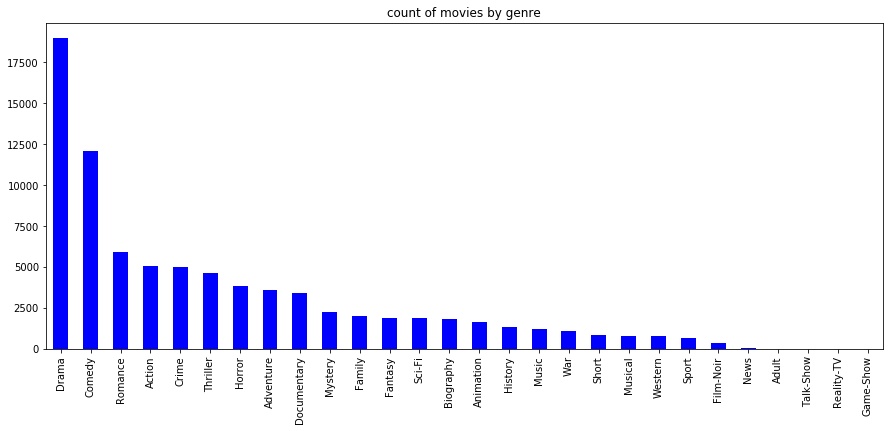

In [8]:
df_freq.iloc[:,0].plot.bar(figsize=(15, 6), color='blue')
plt.title('count of movies by genre')

Text(0.5, 1.0, 'proportion of movies by genre')

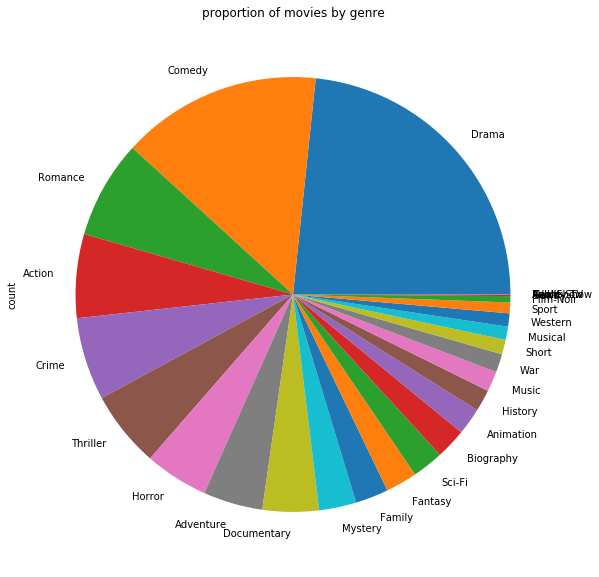

In [9]:
df_freq.iloc[:,0].plot.pie(figsize=(10, 10))
plt.title('proportion of movies by genre')

### number of genres within a movie

In [10]:
df['num_of_genres'] = df[list_of_genres].sum(axis=1)

In [11]:
df_numgenres = pd.concat([df.num_of_genres.value_counts(), df.num_of_genres.value_counts(normalize=True)], axis=1)
df_numgenres.columns = ['count', 'proportion']
df_numgenres

count  proportion
3  15970    0.425096
2  11797    0.314017
1   9801    0.260887

#### Lable cardinality and density

In [14]:
print('Cardinality of the lables is', df.num_of_genres.mean())
print('Density of the lables is', df.num_of_genres.mean()/len(list_of_genres))

Cardinality of the lables is 2.164208901192504
Density of the lables is 0.07729317504258944


### distibution by year and decade

In [19]:
# sorted by year
df.year.value_counts()

# sorted by index
df.year.value_counts().sort_index(ascending=False)

2017       4
2016     659
2015    1501
2014    1661
2013    1601
2012    1495
2011    1420
2010    1326
2009    1401
2008    1357
2007    1321
2006    1192
2005     998
2004     895
2003     782
2002     789
2001     748
2000     694
1999     630
1998     618
1997     581
1996     554
1995     533
1994     462
1993     422
1992     384
1991     370
1990     368
1989     359
1988     380
        ... 
1919      20
1918      14
1917      10
1916      23
1915      26
1914      17
1913      12
1912       7
1911       3
1910       4
1909       1
1908       4
1906       1
1905       2
1904       1
1903       4
1902       2
1901       1
1900       2
1899       1
1898       7
1896       1
1895       2
1894       2
1892       3
1891       4
1890       4
1888       2
1887       1
1874       1
Name: year, Length: 128, dtype: int64

In [21]:
# by decade
df['decade'] = df.year.apply(lambda x: (int(x) - (int(x) % 10)))
df_decade = df.decade.value_counts().sort_index(ascending=False)
df_decade

2010     9667
2000    10177
1990     4922
1980     3226
1970     2825
1960     2147
1950     1670
1940     1236
1930     1129
1920      387
1910      136
1900       18
1890       24
1880        3
1870        1
Name: decade, dtype: int64

Text(0.5, 1.0, 'count of movies by decade')

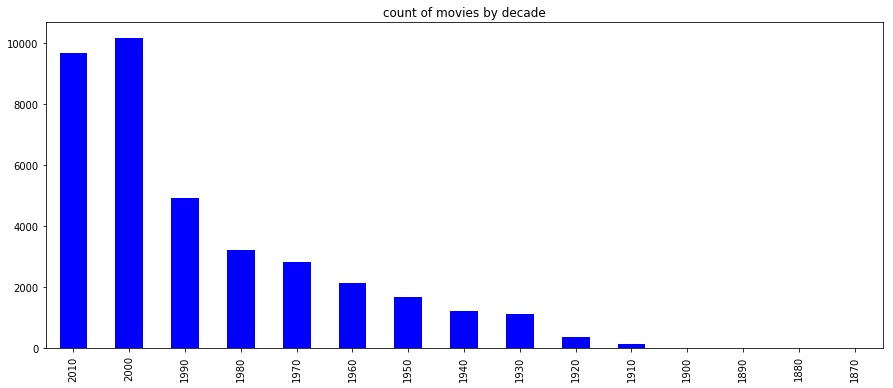

In [22]:
df_decade.plot.bar(figsize=(15, 6), color='blue')
plt.title('count of movies by decade')

## Genre selection

we want to select the genres that are:
1. most frequent
2. most "unique" - tend to come with as few number of genres as possible

### Uniqueness Index

for each genre seperately: number of movies divided by sum num_of_genres

In [23]:
uniqueness_list = []
num_movies_list = []
for genre in list_of_genres:
    df_temp = df[df[genre] == 1]
    uniqueness = len(df_temp) / df_temp['num_of_genres'].sum()
    uniqueness_list.append(uniqueness)
    num_movies_list.append(len(df_temp))

df_uniqueness = pd.DataFrame({'genre': list_of_genres, 'uniquness': uniqueness_list, 'num_of_movies': num_movies_list})
df_uniqueness.sort_values(by=['uniquness'], ascending=False)

genre  uniquness  num_of_movies
18  Documentary   0.559618           3398
15      Western   0.510897            797
14   Reality-TV   0.500000              2
9     Talk-Show   0.500000              5
4     Game-Show   0.500000              1
12        Adult   0.450000              9
27        Drama   0.442243          18970
7        Comedy   0.439401          12109
23       Horror   0.430764           3845
17        Short   0.402278            883
26     Thriller   0.395805           4623
19      Romance   0.391888           5923
16          War   0.390906           1109
5         Sport   0.387366            650
11        Music   0.385292           1226
0        Sci-Fi   0.383726           1891
24      Musical   0.376771            798
6          News   0.375000             78
2        Family   0.368159           1998
20    Biography   0.364913           1845
8       History   0.361614           1317
22        Crime   0.359917           5005
1       Fantasy   0.359168           1900
10      Mystery   0.358725           2251
25       Action   0.358183           5069
21    Adventure   0.352538           3598
3     Animation   0.348209           1623
13    Film-Noir   0.341987            382

In [34]:
df_uniqueness.corr()

uniquness  num_of_movies
uniquness       1.000000       0.041622
num_of_movies   0.041622       1.000000

no correlation between uniqueness and number of moveis

In [24]:
df_uniqueness[df_uniqueness.num_of_movies > 100].sort_values(by=['uniquness'], ascending=False)

genre  uniquness  num_of_movies
18  Documentary   0.559618           3398
15      Western   0.510897            797
27        Drama   0.442243          18970
7        Comedy   0.439401          12109
23       Horror   0.430764           3845
17        Short   0.402278            883
26     Thriller   0.395805           4623
19      Romance   0.391888           5923
16          War   0.390906           1109
5         Sport   0.387366            650
11        Music   0.385292           1226
0        Sci-Fi   0.383726           1891
24      Musical   0.376771            798
2        Family   0.368159           1998
20    Biography   0.364913           1845
8       History   0.361614           1317
22        Crime   0.359917           5005
1       Fantasy   0.359168           1900
10      Mystery   0.358725           2251
25       Action   0.358183           5069
21    Adventure   0.352538           3598
3     Animation   0.348209           1623
13    Film-Noir   0.341987            382

### Pairwise Similarity

#### correlation matrix

In [25]:
df.corr()

imdbId      year    Sci-Fi   Fantasy    Family  Animation  \
imdbId         1.000000  0.588244 -0.003512 -0.035012 -0.002079   0.030068   
year           0.588244  1.000000  0.020679 -0.008947  0.012777   0.044679   
Sci-Fi        -0.003512  0.020679  1.000000 -0.007577 -0.031235  -0.002212   
Fantasy       -0.035012 -0.008947 -0.007577  1.000000  0.123397   0.043566   
Family        -0.002079  0.012777 -0.031235  0.123397  1.000000   0.209855   
Animation      0.030068  0.044679 -0.002212  0.043566  0.209855   1.000000   
Game-Show      0.006556  0.004662 -0.001188 -0.001191 -0.001223  -0.001096   
Sport          0.004345  0.023243 -0.026814 -0.029693  0.002211  -0.028195   
News           0.071938  0.039768 -0.010501 -0.010528 -0.010810  -0.006816   
Comedy        -0.039191  0.001892 -0.081929 -0.000627  0.050000   0.023775   
History        0.010911 -0.022989 -0.041896 -0.039368 -0.036790  -0.034807   
Talk-Show      0.020442  0.008948 -0.002656 -0.002663 -0.002734  -0.002452   
Mystery       -0.014600 -0.006984  0.014207 -0.014251 -0.051338  -0.044819   
Music         -0.008273  0.018001 -0.036119 -0.023932 -0.015491  -0.028712   
Adult         -0.006162 -0.004135 -0.003564 -0.003573 -0.003669  -0.003289   
Film-Noir     -0.071730 -0.189122 -0.023334 -0.023393 -0.024021  -0.021537   
Reality-TV     0.014050  0.006437 -0.001680 -0.001684 -0.001729  -0.001550   
Western       -0.079215 -0.157928 -0.030515 -0.029764 -0.017606  -0.029466   
War           -0.058768 -0.101470 -0.037276 -0.034512 -0.037130  -0.035513   
Short          0.006464 -0.099223 -0.014020  0.004284  0.018039   0.260862   
Documentary    0.187242  0.157618 -0.066234 -0.069394 -0.042894  -0.057879   
Romance       -0.065108 -0.074648 -0.074212 -0.040518 -0.065428  -0.085104   
Biography      0.048926  0.047791 -0.049504 -0.046831 -0.029709  -0.037385   
Adventure     -0.041288 -0.028808  0.040913  0.093302  0.146984   0.222254   
Crime         -0.064694 -0.036045 -0.073779 -0.078689 -0.083841  -0.067510   
Horror         0.014584  0.038877  0.171697  0.082774 -0.076506  -0.057496   
Musical       -0.062140 -0.130378 -0.028850  0.008122  0.017737  -0.015867   
Action        -0.003890  0.068164  0.128590  0.018359 -0.061312   0.054804   
Thriller       0.048416  0.097641  0.036061 -0.060203 -0.086976  -0.076411   
Drama         -0.066651 -0.040510 -0.146801 -0.096311 -0.102705  -0.163542   
num_of_genres -0.079292 -0.025347  0.125299  0.176271  0.161158   0.185225   
decade         0.589723  0.993021  0.019774 -0.008787  0.011778   0.043882   

               Game-Show     Sport      News    Comedy    ...     Biography  \
imdbId          0.006556  0.004345  0.071938 -0.039191    ...      0.048926   
year            0.004662  0.023243  0.039768  0.001892    ...      0.047791   
Sci-Fi         -0.001188 -0.026814 -0.010501 -0.081929    ...     -0.049504   
Fantasy        -0.001191 -0.029693 -0.010528 -0.000627    ...     -0.046831   
Family         -0.001223  0.002211 -0.010810  0.050000    ...     -0.029709   
Animation      -0.001096 -0.028195 -0.006816  0.023775    ...     -0.037385   
Game-Show       1.000000 -0.000685 -0.000235  0.007481    ...     -0.001173   
Sport          -0.000685  1.000000 -0.006052 -0.011142    ...      0.069033   
News           -0.000235 -0.006052  1.000000 -0.027704    ...      0.016695   
Comedy          0.007481 -0.011142 -0.027704  1.000000    ...     -0.115617   
History        -0.000983 -0.000873  0.058076 -0.109775    ...      0.170993   
Talk-Show      -0.000060 -0.001531 -0.000526  0.006855    ...     -0.002622   
Mystery        -0.001303 -0.033499 -0.009052 -0.114359    ...     -0.055299   
Music          -0.000948 -0.020925 -0.008378 -0.020248    ...      0.091365   
Adult          -0.000080 -0.002054 -0.000706 -0.006996    ...     -0.003518   
Film-Noir      -0.000523 -0.001240 -0.004623 -0.069900    ...     -0.023034   
Reality-TV     -0.000038 -0.000968 -0.000333 -0.005032    ...     -0.001658   
Western        -0.00

#### pair similarity index

for each pair of genres: the "pair similarity" is defined as the proportion of movies which are categorized to both genres devided by the number of movies which are categorized to at least one of them.

In [26]:
pair_similarity_list = []
pairs = list(it.combinations(list_of_genres, 2))

for pair in pairs:
    df_temp = df[list(pair)]
    df_temp = df_temp[df_temp.sum(axis=1) > 0]  # remove cases of zeros in both genres
    pair_similarity = (df_temp.sum(axis=1) == 2).mean()  # percentage of cases when movie belongs to both genres 
    pair_similarity_list.append(pair_similarity)

df_pair_similarity = pd.DataFrame({'pair': pairs, 'pair_similarity': pair_similarity_list})
df_pair_similarity.sort_values(by=['pair_similarity'], ascending=False)

pair  pair_similarity
360       (Adventure, Action)         0.198092
349          (Romance, Drama)         0.182959
179         (Comedy, Romance)         0.178562
370        (Horror, Thriller)         0.159365
91         (Animation, Short)         0.156971
365           (Crime, Action)         0.156867
187           (Comedy, Drama)         0.151031
95     (Animation, Adventure)         0.143452
367            (Crime, Drama)         0.141830
53        (Family, Animation)         0.140472
366         (Crime, Thriller)         0.136852
240       (Mystery, Thriller)         0.123753
22           (Sci-Fi, Horror)         0.121408
237         (Mystery, Horror)         0.115258
334  (Documentary, Biography)         0.113400
199      (History, Biography)         0.112597
71        (Family, Adventure)         0.110317
375        (Action, Thriller)         0.099240
24           (Sci-Fi, Action)         0.097100
236          (Mystery, Crime)         0.096238
27          (Fantasy, Family)         0.092183
248      (Music, Documentary)         0.088256
377         (Thriller, Drama)         0.086534
46       (Fantasy, Adventure)         0.080157
376           (Action, Drama)         0.077595
48          (Fantasy, Horror)         0.075037
197    (History, Documentary)         0.072810
182           (Comedy, Crime)         0.072440
195            (History, War)         0.069665
181       (Comedy, Adventure)         0.067777
..                        ...              ...
191          (History, Adult)         0.000000
31            (Fantasy, News)         0.000000
131            (Sport, Adult)         0.000000
133       (Sport, Reality-TV)         0.000000
165            (News, Action)         0.000000
243        (Music, Film-Noir)         0.000000
62            (Family, Adult)         0.000000
54        (Family, Game-Show)         0.000000
149         (News, Talk-Show)         0.000000
228     (Mystery, Reality-TV)         0.000000
151             (News, Music)         0.000000
152             (News, Adult)         0.000000
299       (Reality-TV, Drama)         0.000000
298    (Reality-TV, Thriller)         0.000000
297      (Reality-TV, Action)         0.000000
296     (Reality-TV, Musical)         0.000000
295      (Reality-TV, Horror)         0.000000
294       (Reality-TV, Crime)         0.000000
293   (Reality-TV, Adventure)         0.000000
292   (Reality-TV, Biography)         0.000000
291     (Reality-TV, Romance)         0.000000
56             (Family, News)         0.000000
289       (Reality-TV, Short)         0.000000
288         (Reality-TV, War)         0.000000
287     (Reality-TV, Western)         0.000000
153         (News, Film-Noir)         0.000000
154        (News, Reality-TV)         0.000000
174      (Comedy, Reality-TV)         0.000000
283      (Film-Noir, Musical)         0.000000
188      (History, Talk-Show)         0.000000

[378 rows x 2 columns]

## clustering

### PCA

Here the PCA is on the *labels*, but it is still relevant in the context of choosing genres, and anyway it is interesting to see the results.  

In [27]:
df_genres = df[list_of_genres]

In [28]:
from sklearn.decomposition import PCA
num_components=4

pca = PCA(n_components=num_components)
pca.fit(df_genres)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
print(pca.explained_variance_ratio_)

[0.18010556 0.14229252 0.08752557 0.07885386]


In [30]:
df_pca = pd.DataFrame({'component_'+str(i): pca.components_[i] for i in range(len(pca.components_))}).set_index(list_of_genres)
df_pca.sort_values(by=['component_0'], ascending=False)

component_0  component_1  component_2  component_3
Comedy          0.505154     0.691126     0.292347     0.161572
Adventure       0.094982    -0.100996     0.175447    -0.447041
Documentary     0.090800    -0.147954    -0.362462    -0.182570
Horror          0.087544    -0.222599    -0.139433     0.374820
Animation       0.068307    -0.026804     0.023941    -0.144514
Action          0.060063    -0.237861     0.564009    -0.349745
Family          0.057181     0.010455    -0.023033    -0.126752
Sci-Fi          0.044534    -0.095196     0.002811     0.001194
Fantasy         0.043450    -0.022559    -0.016837    -0.057392
Short           0.026140    -0.010259    -0.029396    -0.028659
Musical         0.017787     0.029119    -0.015190     0.001835
Western         0.011448    -0.011595    -0.022714    -0.017748
News            0.001507    -0.003507    -0.008424    -0.004308
Talk-Show       0.000167     0.000095    -0.000058     0.000017
Game-Show       0.000066     0.000042     0.000007     0.000019
Reality-TV      0.000059    -0.000103    -0.000223    -0.000099
Adult          -0.000026    -0.000193    -0.000372     0.000219
Music          -0.000324     0.003552    -0.068885    -0.032470
Sport          -0.002507     0.003418    -0.020112    -0.018924
Film-Noir      -0.018629    -0.006315     0.021721     0.015996
Mystery        -0.021530    -0.090395     0.012524     0.217739
War            -0.034208    -0.000101    -0.029782    -0.037455
History        -0.034932    -0.016256    -0.064331    -0.070227
Thriller       -0.039161    -0.294124     0.130527     0.541327
Biography      -0.047186    -0.020453    -0.094110    -0.092911
Romance        -0.064769     0.377704    -0.214171     0.088884
Crime          -0.096864    -0.115107     0.557087     0.263973
Drama          -0.826315     0.348267     0.137244    -0.042882

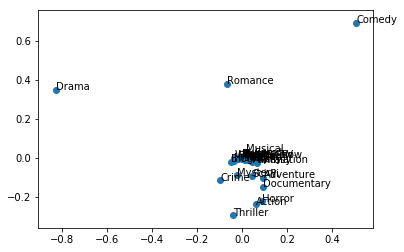

In [31]:
x =  df_pca.component_0
y = df_pca.component_1

fig, ax = plt.subplots()
plt.scatter(x,y)
for i, txt in enumerate(df_pca.index):
    ax.annotate(txt, (x[i], y[i]))

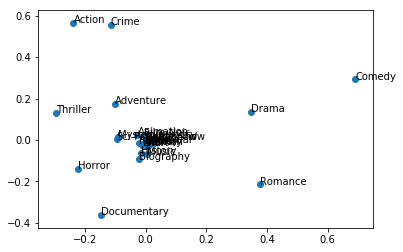

In [32]:
x =  df_pca.component_1
y = df_pca.component_2

fig, ax = plt.subplots()
plt.scatter(x,y)
for i, txt in enumerate(df_pca.index):
    ax.annotate(txt, (x[i], y[i]))

we can nicely see that:
1. Action and Crime are close by
2. Thriller and Horror are relatively close by
3. Drama is close to Romance on the x axis and to Comedy on the y axis 
4. Documnetry is low on both axes
...

Preliminary genres are chosen by:
- Genre frequency
- Low statistical Pairwise Similarity:
- Low human percieved correlation

The genres: 
1. Drama (Romance omitted)
2. Comedy 
3. Action (Adventure and crime omitted)	
4. Horror (Thriller omitted - though has higher frequency; Mystery omitted)
5. Documentary (Biography and History omitted)
6. Fantasy
7. Sci-Fi
8. Animation (Family Omitted - though has higher frequency)

------------------------
(9. Music)	
(10. War)

#### (TSNE)

In [57]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(df_genres)

(37723, 28)

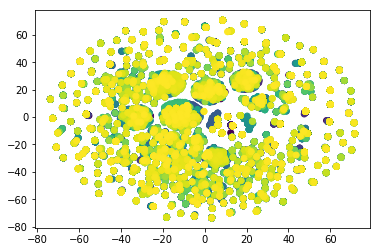

In [60]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df_genres.index)
plt.show()

TSNE results are not informative and looks like mold.